<a href="https://colab.research.google.com/github/ShylaSreeGitHub/Chatbot-Using-Pytorch/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [5]:
!pip install notebooks

ERROR: Could not find a version that satisfies the requirement notebooks (from versions: none)
ERROR: No matching distribution found for notebooks


In [4]:
NUM_CLASSES = 10

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [8]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


ReLU

In [9]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2880 - loss: 1.9607
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3981 - loss: 1.6831
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4363 - loss: 1.5835
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4586 - loss: 1.5227
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4714 - loss: 1.4855
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4839 - loss: 1.4515
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4898 - loss: 1.4264
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4970 - loss: 1.4133
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5095 - loss: 1.3787
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5095 - loss: 1.3712


In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4879 - loss: 1.4299


[1.430968999862671, 0.4916999936103821]

In [13]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


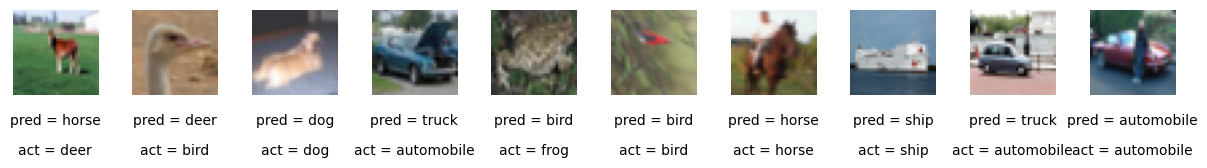

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

LeakyReLU


In [15]:
# 1. Load CIFAR-10 dataset
(a_train, b_train), (a_test, b_test) = datasets.cifar10.load_data()
a_train, a_test = a_train/255.0, a_test/255.0
b_train, b_test = utils.to_categorical(b_train, NUM_CLASSES), utils.to_categorical(b_test, NUM_CLASSES)


In [16]:
# 2. Build MLP with LeakyReLU
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)

In [17]:
# LeakyReLU layers
x = layers.Dense(200)(x)
x = layers.LeakyReLU(alpha=0.01)(x)

x = layers.Dense(150)(x)
x = layers.LeakyReLU(alpha=0.01)(x)

output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model_leaky = models.Model(input_layer, output_layer)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:
model_leaky.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(0.0005),
    metrics=['accuracy']
)

In [19]:
# 4. Train the model
history_leaky = model_leaky.fit(
    a_train, b_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(a_test, b_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2901 - loss: 1.9616 - val_accuracy: 0.3799 - val_loss: 1.7277
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3983 - loss: 1.6765 - val_accuracy: 0.4416 - val_loss: 1.5736
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4340 - loss: 1.5867 - val_accuracy: 0.4162 - val_loss: 1.6211
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4585 - loss: 1.5233 - val_accuracy: 0.4479 - val_loss: 1.5492
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.4718 - loss: 1.4908 - val_accuracy: 0.4685 - val_loss: 1.4878
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.4846 - loss: 1.4568 - val_accuracy: 0.4690 - val_loss: 1.4873
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4958 - loss: 1.4295 - val_accuracy: 0.4612 - val_loss: 1.5245
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4986 -

In [20]:
# 5. Evaluate
loss, acc = model_leaky.evaluate(a_test, b_test)
print("LeakyReLU Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4910 - loss: 1.4354
LeakyReLU Test Accuracy: 0.49309998750686646


Sigmoid

In [21]:
# 1. Load CIFAR-10 dataset
(m_train, n_train), (m_test, n_test) = datasets.cifar10.load_data()
m_train, m_test = m_train/255.0, m_test/255.0
n_train, n_test = utils.to_categorical(n_train, NUM_CLASSES), utils.to_categorical(n_test, NUM_CLASSES)


In [22]:
# 2. Build MLP with Sigmoid activation
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)

In [23]:
# Sigmoid layers
x = layers.Dense(200, activation='sigmoid')(x)
x = layers.Dense(150, activation='sigmoid')(x)

In [24]:
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model_sigmoid = models.Model(input_layer, output_layer)

In [25]:
# 3. Compile the model
model_sigmoid.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(0.0005),
    metrics=['accuracy']
)

In [26]:
# 4. Train the model
history_sigmoid = model_sigmoid.fit(
    m_train, n_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(m_test, n_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2657 - loss: 2.0189 - val_accuracy: 0.3908 - val_loss: 1.7257
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3872 - loss: 1.7163 - val_accuracy: 0.4157 - val_loss: 1.6502
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4165 - loss: 1.6315 - val_accuracy: 0.4245 - val_loss: 1.6043
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4396 - loss: 1.5680 - val_accuracy: 0.4493 - val_loss: 1.5527
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4613 - loss: 1.5182 - val_accuracy: 0.4514 - val_loss: 1.5228
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4653 - loss: 1.4980 - val_accuracy: 0.4551 - val_loss: 1.5252
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4757 - loss: 1.4721 - val_accuracy: 0.4596 - val_loss: 1.5355
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4831 -

In [27]:
# 5. Evaluate
loss, acc = model_sigmoid.evaluate(m_test, n_test)
print("Sigmoid Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4792 - loss: 1.4727
Sigmoid Test Accuracy: 0.476500004529953
